In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
from PIL import Image
from tqdm.notebook import tqdm
import skimage.io
import tensorflow as tf
import math
import glob


In [7]:
data = pd.read_csv('../../../input/prostate-cancer-grade-assessment/train.csv')
input_path = '../../../input/prostate-cancer-grade-assessment/train_images/'
data.head(3)

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4


In [9]:
def read_image(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    return image

image = read_image(input_path + data.image_id[0] + '.jpeg')

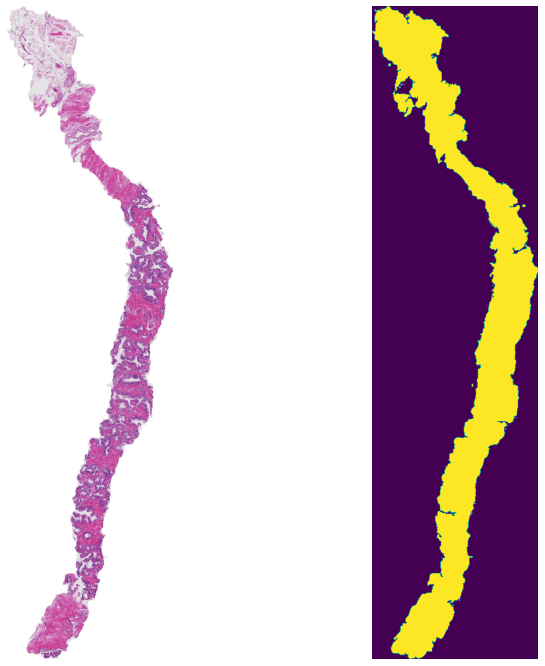

In [10]:
def _mask_tissue(image, kernel_size=(7, 7), gray_threshold=220):
    """Masks tissue in image. Uses gray-scaled image, as well as
    dilation kernels and 'gap filling'
    """
    # Define elliptic kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    # Convert rgb to gray scale for easier masking
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Now mask the gray-scaled image (capturing tissue in biopsy)
    mask = np.where(gray < gray_threshold, 1, 0).astype(np.uint8)
    # Use dilation and findContours to fill in gaps/holes in masked tissue
    mask = cv2.dilate(mask, kernel, iterations=1)
    contour, _ = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contour:
        cv2.drawContours(mask, [cnt], 0, 1, -1)
    return mask


fig, axes = plt.subplots(1, 2, figsize=(12, 12))

mask = _mask_tissue(image)

axes[0].imshow(image)
axes[1].imshow(mask)
axes[0].axis('off')
axes[1].axis('off');

In [87]:
y = range(10)
x = range(20, 30)


for i in y:
    
    if i == 15:
        break
else:
    print(x)

range(20, 30)


In [97]:
import itertools


def compute_coords(image, patch_size, sample_size=36):
    
    coords = []
    for y in range(0, image.shape[0]-patch_size+1, patch_size//2):
        for x in range(0, image.shape[1]-patch_size+1, patch_size//2):
            coords.append((y, x))
    
    coords_with_scores = []
    for (y, x) in coords:
        info_score = image[y: y+patch_size, x: x+patch_size].mean()
        coords_with_scores.append((info_score, y, x))
        
    coords_with_scores_sorted = sorted(coords_with_scores, key=lambda x: x[0])
    
    coords_keep = []
    
    for (s1, y1, x1) in coords_with_scores_sorted:
        
        
#         for (s2, y2, x2) in coords_keep:
#             x_left = max(x1, x2)
#             x_right = min(x1+patch_size, x2+patch_size)
#             y_top = max(y1, y2)
#             y_bottom = min(y1+patch_size, y2+patch_size)

#             intersection_area = (x_right - x_left) * (y_bottom - y_top)
    
#             if intersection_area > 0:
#                 break
#         else:
        coords_keep.append((s1, y1, x1))
        
        if len(coords_keep) == sample_size:
            break
    return coords_keep
                    
                
                
        
    # sort by scores
    
#     for (val, y, x) in coords:
#         # compute
        
        
#         y_top = y
#         y_bottom = y + patch_size
#         x_left = x 
#         x_right = x + patch_size
        
#         intersection_area = (x_right - x_left) * (y_bottom - y_top)
        
#         print(intersection_area)
    
#    return coords

In [98]:
image_path = input_path + data.image_id[10] + '.jpeg'
image = read_image(image_path)
coords = compute_coords(image, patch_size=patch_size)

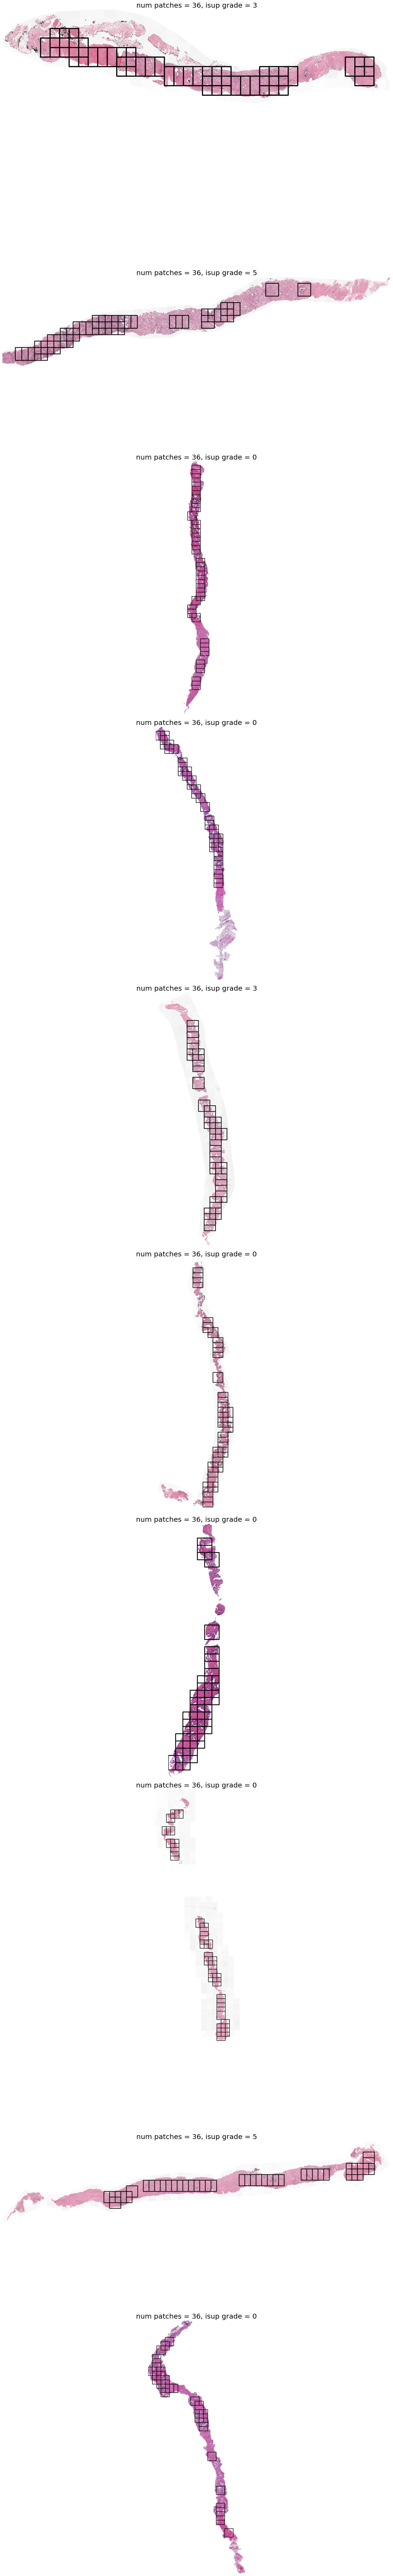

In [99]:
fig, axes = plt.subplots(10, 1, figsize=(20, 140))

patch_size = 256

for i, ax in enumerate(axes.reshape(-1)):
    image_path = input_path + data.image_id[i+500] + '.jpeg'
    image = read_image(image_path)
    coords = compute_coords(image, patch_size=patch_size)
    
    # sort coords (high info -> low info)
    coords = sorted(coords, key= lambda x: x[0], reverse=False)
    for (v, y, x) in coords:
        end_point = (x, y)
        start_point = (x+patch_size, y+patch_size)
        image = cv2.rectangle(image, start_point, end_point, 2, 14)
    
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(
        "num patches = "+str(len(coords))+", isup grade = "+str(data.isup_grade[i+500]),
        fontsize=20)

plt.subplots_adjust(hspace=0.05, wspace=0.05)